# Language Models

In this session we will learn the following:
- How to use NLTK to build n-gram Language Models
- Build a Recurrent Neural Language Model
- Apply Language Models to generation.

## Preliminary Steps

Make sure you have the latest NLTK version (3.4 or higher).
You can install NLTK using pip: pip install NLTK

The following examples will be using Python 3 syntax and conventions.
Once you have installed NLTK, you need to download the required corpora. Launch the Python interpreter and type:

In [ ]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

A new window should open, showing the NLTK Downloader. Next, select all-corpora to download.

NLTK provides many corpora covering different types of texts. We’ll work with the C-span corpus of state of the union and inaugural speeches by US presidents.

To access the corpora:

In [ ]:
from nltk.corpus import state_union
from nltk.corpus import inaugural


#To list all documents in a corpus, you can use the fileids() method:
inaugural.fileids()


['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [ ]:
#To access the content of a given document, you can use the raw(), words() and sents() methods as follows:
inaugural.raw('2009-Obama.txt')

'My fellow citizens:\n\nI stand here today humbled by the task before us, grateful for the trust you have bestowed, mindful of the sacrifices borne by our ancestors. I thank President Bush for his service to our nation, as well as the generosity and cooperation he has shown throughout this transition.\n\nForty-four Americans have now taken the presidential oath. The words have been spoken during rising tides of prosperity and the still waters of peace. Yet, every so often the oath is taken amidst gathering clouds and raging storms. At these moments, America has carried on not simply because of the skill or vision of those in high office, but because We the People have remained faithful to the ideals of our forbearers, and true to our founding documents.\n\nSo it has been. So it must be with this generation of Americans.\n\nThat we are in the midst of crisis is now well understood. Our nation is at war, against a far-reaching network of violence and hatred. Our economy is badly weakened

In [ ]:
inaugural.words('2009-Obama.txt')


['My', 'fellow', 'citizens', ':', 'I', 'stand', 'here', ...]

In [ ]:
inaugural.sents('2009-Obama.txt')

[['My', 'fellow', 'citizens', ':'], ['I', 'stand', 'here', 'today', 'humbled', 'by', 'the', 'task', 'before', 'us', ',', 'grateful', 'for', 'the', 'trust', 'you', 'have', 'bestowed', ',', 'mindful', 'of', 'the', 'sacrifices', 'borne', 'by', 'our', 'ancestors', '.'], ...]

## The LM Module: Basics

Since NLTK 3.4, the **lm** module allows to build language models.
First thing we need is to count types (words, bigrams, trigrams, etc.): we can do this in different ways, using Counter from the collections package or, more properly, by using NgramCounter from the lm module:


In [ ]:
from nltk.util import ngrams
from nltk.lm import NgramCounter

let's count all unigrams (single words) in the State of the Union corpus (state_union):

In [ ]:
text_unigrams = [ngrams(sent, 1) for sent in state_union.sents()]
#for tu in text_unigrams:
#    print(list(tu))
ngram_counts=NgramCounter(text_unigrams)
ngram_counts.N()


399829

be careful since the ngrams function produces a generator: once the ngrams are used, they are 'lost'.

You can look at the frequencies of a type (word) in a very simple way:

In [ ]:
ngram_counts['the']

19191

In [ ]:
ngram_counts.unigrams.most_common(20)

[('the', 19191),
 ('.', 17504),
 (',', 17484),
 ('of', 12854),
 ('to', 11868),
 ('and', 11748),
 ('in', 6936),
 ('a', 5837),
 ('our', 5141),
 ('we', 4338),
 ('that', 4309),
 ('for', 4070),
 ('is', 3621),
 ('I', 3394),
 ('will', 2959),
 ("'", 2620),
 ('have', 2486),
 ('be', 2481),
 ('this', 2323),
 ('are', 2273)]

If you have matplotlib installed, it is possible to display a rank/frequency diagram by typing:

<Axes: xlabel='Samples', ylabel='Counts'>

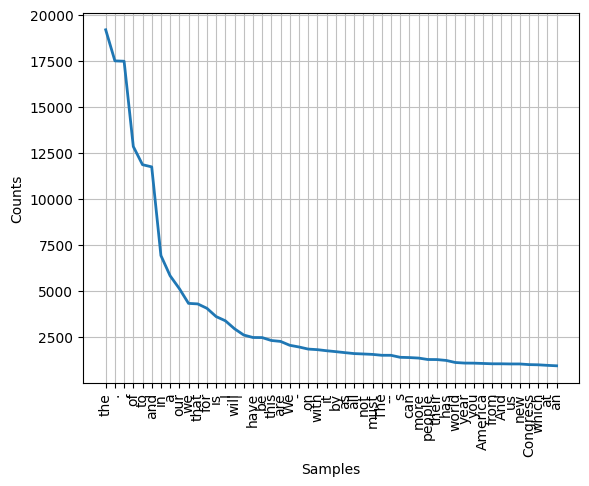

In [ ]:
ngram_counts.unigrams.plot(50)

Example for bigrams:

In [ ]:
text_bigrams = [ngrams(sent, 2) for sent in state_union.sents()]
ngram_counts=NgramCounter(text_bigrams)
ngram_counts[['the']]

FreqDist({'world': 645, 'Congress': 561, 'United': 401, 'American': 278, 'people': 237, 'Federal': 213, 'next': 189, 'past': 185, 'most': 179, 'future': 172, ...})

In [ ]:
ngram_counts[['the']]['people']

237

In [ ]:
state_union.sents()

[['PRESIDENT', 'HARRY', 'S', '.', 'TRUMAN', "'", 'S', 'ADDRESS', 'BEFORE', 'A', 'JOINT', 'SESSION', 'OF', 'THE', 'CONGRESS'], ['April', '16', ',', '1945'], ...]

Vocabulary objects allow to create a vocabulary from a set of types and a frequency threshold:

In [ ]:
from nltk.lm import Vocabulary

vocab = Vocabulary(state_union.words(), unk_cutoff=2)
#The vocabulary will include all words that appear at least 2 times in the corpus.

vocab["America"]

1076

In [ ]:
vocab

**Exercise 1**: Count the number of unigrams for each of the presidents in the inaugural dataset. Which one held the longest discourse? Which one the shortest one?

In [ ]:
speeches = inaugural.fileids()
unigram_counts_ngramcounter = {}

for speech in speeches:
    sentences = inaugural.sents(speech)
    tokens = [word.lower() for sent in sentences for word in sent if word.isalpha()]
    unigrams = list(ngrams(tokens, 1))
    ngram_counter = NgramCounter([unigrams])
    unigram_counts_ngramcounter[speech] = sum(ngram_counter[1].values())

longest_speech_ngram = max(unigram_counts_ngramcounter, key=unigram_counts_ngramcounter.get)
shortest_speech_ngram = min(unigram_counts_ngramcounter, key=unigram_counts_ngramcounter.get)

print(f"Longest speech: {longest_speech_ngram} ({unigram_counts_ngramcounter[longest_speech_ngram]} words)")
print(f"Shortest speech: {shortest_speech_ngram} ({unigram_counts_ngramcounter[shortest_speech_ngram]} words)")

Longest speech: 1841-Harrison.txt (8469 words)
Shortest speech: 1793-Washington.txt (135 words)


**1.b)**: Count the number of different *types*. Which president used the "richest vocabulary" for his speech?

In [ ]:
vocabulary_counts = {}
for speech in speeches:
    sentences = inaugural.sents(speech)
    tokens = [word.lower() for sent in sentences for word in sent if word.isalpha()]
    vocabulary_counts[speech] = len(set(tokens))


richest_vocab_speech = max(vocabulary_counts, key=vocabulary_counts.get)
print(f"President with the richest vocabulary: {richest_vocab_speech} ({vocabulary_counts[richest_vocab_speech]} unique words)")

President with the richest vocabulary: 1841-Harrison.txt (1800 unique words)


## Building a language model

Once we have the data we need to introduce padding to tell the model what the boundaries of the sentence are, and to calculate probabilities for the starting and the end of a sentence. Luckily, NLTK has a function that allows us to do it easily:

In [ ]:
from nltk.lm.preprocessing import pad_both_ends
from nltk.util import bigrams

sentence=inaugural.sents('2009-Obama.txt')[1]

list(pad_both_ends(sentence, n=2))
list(bigrams(pad_both_ends(sentence, n=2))) #extract bigrams

[('<s>', 'I'),
 ('I', 'stand'),
 ('stand', 'here'),
 ('here', 'today'),
 ('today', 'humbled'),
 ('humbled', 'by'),
 ('by', 'the'),
 ('the', 'task'),
 ('task', 'before'),
 ('before', 'us'),
 ('us', ','),
 (',', 'grateful'),
 ('grateful', 'for'),
 ('for', 'the'),
 ('the', 'trust'),
 ('trust', 'you'),
 ('you', 'have'),
 ('have', 'bestowed'),
 ('bestowed', ','),
 (',', 'mindful'),
 ('mindful', 'of'),
 ('of', 'the'),
 ('the', 'sacrifices'),
 ('sacrifices', 'borne'),
 ('borne', 'by'),
 ('by', 'our'),
 ('our', 'ancestors'),
 ('ancestors', '.'),
 ('.', '</s>')]

The module lm will need also a flattened list of symbols to build the vocabulary. We can do it with the following function:

In [ ]:
from nltk.lm.preprocessing import flatten
list(flatten(pad_both_ends(sent, n=2) for sent in inaugural.sents('2009-Obama.txt')))


['<s>',
 'My',
 'fellow',
 'citizens',
 ':',
 '</s>',
 '<s>',
 'I',
 'stand',
 'here',
 'today',
 'humbled',
 'by',
 'the',
 'task',
 'before',
 'us',
 ',',
 'grateful',
 'for',
 'the',
 'trust',
 'you',
 'have',
 'bestowed',
 ',',
 'mindful',
 'of',
 'the',
 'sacrifices',
 'borne',
 'by',
 'our',
 'ancestors',
 '.',
 '</s>',
 '<s>',
 'I',
 'thank',
 'President',
 'Bush',
 'for',
 'his',
 'service',
 'to',
 'our',
 'nation',
 ',',
 'as',
 'well',
 'as',
 'the',
 'generosity',
 'and',
 'cooperation',
 'he',
 'has',
 'shown',
 'throughout',
 'this',
 'transition',
 '.',
 '</s>',
 '<s>',
 'Forty',
 '-',
 'four',
 'Americans',
 'have',
 'now',
 'taken',
 'the',
 'presidential',
 'oath',
 '.',
 '</s>',
 '<s>',
 'The',
 'words',
 'have',
 'been',
 'spoken',
 'during',
 'rising',
 'tides',
 'of',
 'prosperity',
 'and',
 'the',
 'still',
 'waters',
 'of',
 'peace',
 '.',
 '</s>',
 '<s>',
 'Yet',
 ',',
 'every',
 'so',
 'often',
 'the',
 'oath',
 'is',
 'taken',
 'amidst',
 'gathering',
 'cloud

There is also a convenience method called everygram_pipeline that produces the two at the same time – from the manual:
    
    padded_everygram_pipeline(order, text):
    Default preprocessing for a sequence of sentences.

    Creates two iterators:
    - sentences padded and turned into sequences of `nltk.util.everygrams`
    - sentences padded as above and chained together for a flat stream of words

    :param order: Largest ngram length produced by `everygrams`.
    :param text: Text to iterate over. Expected to be an iterable of sentences:
    Iterable[Iterable[str]]
    :return: iterator over text as ngrams, iterator over text as vocabulary data

For example:

In [ ]:
from nltk.lm.preprocessing import padded_everygram_pipeline

train, vocab = padded_everygram_pipeline(3, inaugural.sents())


Having prepared our data we are ready to start training a model. As a simple example, let us train a Maximum Likelihood Estimator (MLE).

In [ ]:
from nltk.lm import MLE
lm = MLE(3) #the parameter is the highest n-gram order for our model. We consider up to trigrams in this example

lm.fit(train, vocab) #fit with the data. May take a while

We can verify frequencies in the same way as we did with the NgramCounter:

In [ ]:
lm.counts['America']

240

In [ ]:
lm.counts[['bless']]['America']

5

The score function returns the probability of observing the given word:

In [ ]:
#lm.score('America')
#lm.score('America', ['bless']) #or the probability of observing a word given the previous word
lm.score('America', ['God', 'bless'])

0.29411764705882354

Note that these probabilities are not smoothed since we used a MLE model. For better results, models with smoothing are available:
-	nltk.lm.Lidstone (requires the gamma parameter to increase scores)
-	nltk.lm.Laplace (add 1)
-	nltk.lm.KneserNeyInterpolated

**Exercise 2**: Build a language model from the **state_union** dataset. Verify the probabilities for the words "America", "the" and "jobs", first without smoothing and then using Laplace smoothing (warning: it may take a certain time).

In [152]:
from nltk.lm.preprocessing import padded_everygram_pipeline

text = [list(nltk.word_tokenize(state_union.raw(fileid).lower())) for fileid in state_union.fileids()]
train_data, vocab = padded_everygram_pipeline(3, text)


In [160]:
mle_model = MLE(3)
mle_model.fit(train_data, vocab)

words_to_check = ["america", "the", "jobs"]
for word in words_to_check:
    print(f"{word}: {mle_model.score(word)}")


america: 0.002739893149250469
the: 0.05312291902827834
jobs: 0.0007091189133959934


In [157]:
laplace_model = Laplace(n)
laplace_model.fit(train_data, vocab)

words_to_check = ["america", "the", "jobs"]
for word in words_to_check:
    print(f"{word}: {laplace_model.score(word)}")


america: 0.002649178975487115
the: 0.05131894248900063
jobs: 0.000687460716530484


## Evaluating language models: perplexity

Perplexity is a measure of how well does your model approximate true probability distribution behind data. __Smaller perplexity = better model__.

To compute perplexity on one sentence, use:
$$
    {\mathbb{P}}(w_1 \dots w_N) = 2^{-\frac{1}{N} \left( \sum_{t=1}^N \log P(w_t \mid w_{t - n}, \dots, w_{t - 1})\right)},
$$


**Exercise 3**: We would like to create a function that calculates the perplexity on a given test set, made of multiple sentences, returning their average. Complete the following code to calculate the perplexity as defined above

Hint: you can obtain the log-probabilities from the model with the function lm.logscore(...). To help, we include the conversion of the input sentences into sequences of n-grams, including the start and the end of the sentences (special symbols \<s> and \</s> )

In [189]:
from nltk.util import ngrams
import numpy as np

def perplexity(lm, sents, n, min_logprob=np.log(10 ** -50.)):
    """
    :param sents: a list of sentences (each sentence a list of words)
    :param n: the size of n-grams for which to compute the perplexity. This cannot exceed the size used for the construction of the LM
    :param min_logprob: if log(P(w | ...)) is smaller than min_logprob, set it equal to min_logprob
    :returns: corpora-level perplexity - a single scalar number from the formula above
    """

    test_data = [nltk.ngrams(t, n, pad_right=True, pad_left=True, left_pad_symbol="<s>", right_pad_symbol="</s>") for t in sents]
    prp=[]

    for test in test_data:
          sentence_logprob = 0.0
          count = 0
          for ngram in test:
              log_prob = lm.logscore(ngram[-1], ngram[:-1])
              sentence_logprob += max(log_prob, min_logprob)
              count += 1
          if count > 0:
              prp.append(-sentence_logprob / count)

    if prp:
        avg_log_prob = np.mean(prp)
        return avg_log_prob
    else:
        return float('inf')


**Exercise 3.a**: Evaluate your perplexity function on the *inaugural* dataset and test for $n \in \{1,2,3,4\}$. What do you obtain? Can you explain the result?

In [190]:
#example
sents=inaugural.sents()

perplexity(lm, sents, 3)
#YOUR CODE

2.082101081502797

In [191]:
perplexity(lm, sents, 1)
#YOUR CODE

9.412302535394222

In [192]:
perplexity(lm, sents, 2)

5.129410605369768

In [193]:
perplexity(lm, sents, 4)

115.12925464970236

The perplexity for n=1 (unigrams) is extremely high because the model does not take context into account, making its predictions insensitive to the structure of the language. As n increases to 2 (bigrams) and 3 (trigrams), the perplexity decreases significantly, indicating improved accuracy due to the use of context. However, for
n=4, the perplexity becomes extremely large (or infinite), pointing to an issue with insufficient data for rare or missing 4-grams. This highlights the importance of balance: larger 𝑛 n-grams provide more context but suffer from data sparsity.

## Generation

Finally, we are using the model to generate language. The key function is called **generate**, always in the lm interface

    def generate(self, num_words=1, text_seed=None, random_seed=None):
        Generate words from the model.

        :param int num_words: How many words to generate. By default 1.
        :param text_seed: Generation can be conditioned on preceding context.
        :param random_seed: If provided, makes the random sampling part of
        generation reproducible.
        :return: One (str) word or a list of words generated from model.

**Exercise 4**: Generate 10 sentences, each composed by 10 words, using the prompt "I shall", and calculate the average perplexity on the generated set. Compare this value to the value obtained on the *inaugural* dataset. Try for 2- and 3- grams.

What can you conclude about the quality of the generated text (both on the basis of the values you obtained and your personal judgment)?

In [194]:
lm.generate(10, ["I", "shall"])
#YOUR CODE HERE

['look', 'to', 'the', 'nations', 'at', 'war', '.', '</s>', '</s>', '</s>']

In [196]:
generated_sentences = [lm.generate(10, text_seed=["I", "shall"], random_seed=42) for _ in range(10)]

perplexity_2gram = perplexity(lm, generated_sentences , n=2)
perplexity_3gram = perplexity(lm, generated_sentences , n=3)


print(f"Perplexity for generated sentences (2-grams): {perplexity_2gram}")
print(f"Perplexity for generated sentences (3-grams): {perplexity_3gram}")


Perplexity for generated sentences (2-grams): 25.492266210741597
Perplexity for generated sentences (3-grams): 40.61852514599828


The perplexity for 2-grams is lower than for 3-grams, which may indicate that the model performs better with short-term context but loses coherence over longer sequences. Comparing this to the inaugural dataset shows that the quality of the generated text is lower, especially when considering more complex dependencies. This highlights the model's limitations in generating fully meaningful text based on longer context.

# Neural Language Models

The following script contains a demonstration of how to create a neural language model using Recurrent NN (in this case, LSTM) with Keras. Word vectors are one-hot representations. This script has an embedded training text, which is too short to produce reliable results (as you will probably notice).

In [198]:
!pip install tensorflow

In [203]:
from keras.utils import pad_sequences
from keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping
from keras.models import Sequential
import keras.utils as ku
import numpy as np

tokenizer = Tokenizer()

def dataset_preparation(data):
    #the purpose of this function is to transform the text in a format that can be handled by the model
    corpus = data.lower().split("\n")
    tokenizer.fit_on_texts(corpus)
    total_words = len(tokenizer.word_index) + 1
    input_sequences = []
    for line in corpus: #process corpus one line at a time
        token_list = tokenizer.texts_to_sequences([line])[0]
        for i in range(1, len(token_list)):
            n_gram_sequence = token_list[:i+1]
            input_sequences.append(n_gram_sequence)

    max_sequence_len = max([len(x) for x in input_sequences])
    input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

    predictors, label = input_sequences[:,:-1],input_sequences[:,-1]
    label = ku.to_categorical(label, num_classes=total_words)
    return predictors, label, max_sequence_len, total_words

def create_model(predictors, label, max_sequence_len, total_words):
    input_len = max_sequence_len - 1
    model = Sequential()
    model.add(Embedding(total_words, 10, input_length=input_len)) #Input Layer : Takes the sequence of words as input
    model.add(LSTM(150)) #LSTM Layer : Computes the output using LSTM units.
    model.add(Dropout(0.5)) #Dropout Layer : A regularisation layer which randomly turns-off the activations of some neurons in the LSTM layer. It helps in preventing over fitting.
    model.add(Dense(total_words, activation='softmax')) #Output Layer : Computes the probability of the best possible next word as output

    model.compile(loss='categorical_crossentropy', optimizer='adam')
    model.fit(predictors, label, epochs=500, verbose=1)
    return model


The following cell has some text that is used to train the model; use the short text to take a look at how the testing works, and the 10 discourses (initially commented) from the inaugural dataset for the final experiments. If this takes too long, you can reduce the number of epochs above.

In [204]:
data = """The cat and her kittens
They put on their mittens,
To eat a Christmas pie.
The poor little kittens
They lost their mittens,
And then they began to cry.
O mother dear, we sadly fear
We cannot go to-day,
For we have lost our mittens.
If it be so, ye shall not go,
For ye are naughty kittens.
The three little kittens, they found their mittens,
And they began to cry,
Oh, mother dear, see here, see here,
For we have found our mittens.
Put on your mittens, you silly kittens,
And you shall have some pie.
Purr, purr, purr,
Oh, let us have some pie.
The three little kittens,
they washed their mittens,
And hung them out to dry,
Oh, mother dear, do you not hear,
That we have washed our mittens?
What, washed your mittens,
then you're good kittens,
But I smell a rat close by.
Meow, meow, meow,
We smell a rat close by."""

#data = '\n'.join([' '.join(s) for s in inaugural.sents()[:10]])

X, Y, msl, total_words = dataset_preparation(data)
model = create_model(X, Y, msl, total_words)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 4.2906
Epoch 2/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 4.2845
Epoch 3/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 4.2777
Epoch 4/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.2708
Epoch 5/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 4.2605
Epoch 6/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 4.2402
Epoch 7/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 4.2149
Epoch 8/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 4.1613
Epoch 9/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 4.0858
Epoch 10/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 4.0610
Epoch 11/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 4.0449
Epoch 12/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 4.0203
Epoch 13/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 4.0499
Epoch 14/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 4.0150
Epoch 15/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3.9666
Epoch 16/500
5/5 ━━

### Generating with Temperature

As seen in the course, temperature can be used to tune the creativity of the model.

In the example below, we are not using temperature for sampling as the generate_text function always returns the most probable item.

As the model output are probabilities and not the logits (the softmax has been already applied), we use a trick to calculate the temperature on the final result: we use log to reverse the softmax operation and get logit-like values:

$$e^{(log(a)/T)} = a^{(1/T)}$$

**Exercise 5**: Modify the generate_text function to use temperatures to sample and test the results with temperature temp=2 and temp 0.2. Hint: you can use the function np.random.choice(...) to sample, use as parameters the list of indices of words and as p the probabilities with temperature

In [208]:
def generate_text(seed_text, next_words, max_sequence_len, model, temp=0):
    for j in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=
                             max_sequence_len-1, padding='pre')
        #here we obtain the index of the predicted word
        #note that model.predict(...) returns the probabilities associated to the words
        if temp==0: #if Temperature == 0, then return the most probable token
            predicted = np.argmax(model.predict(token_list), axis=-1)
        else:
            probs=model.predict(token_list)[0]

            scaled_probs = np.log(probs + 1e-10) / temp
            scaled_probs = np.exp(scaled_probs)
            scaled_probs = scaled_probs / np.sum(scaled_probs)

            predicted = np.random.choice(len(scaled_probs), p=scaled_probs)

        output_word = ""
        for word, index in tokenizer.word_index.items():
            #we look for the index in the dictionary created by the tokenizer, then we get the word
            if index == predicted:
                output_word = word
                break
        seed_text += " " + output_word
    return seed_text



In [209]:
text = generate_text("I stand here today humbled by the task before us", 30, msl, model, 0.2)
print(text)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━

### Alternative sampling strategies

__Top-k sampling:__ on each step, sample the next token from __k most likely__ candidates from the language model.

Suppose $k=3$ and the token probabilities are $p=[0.1, 0.35, 0.05, 0.2, 0.3]$. You first need to select $k$ most likely words and set the probability of the rest to zero: $\hat p=[0.0, 0.35, 0.0, 0.2, 0.3]$ and re-normalize:
$p^*\approx[0.0, 0.412, 0.0, 0.235, 0.353]$.

__Nucleus sampling:__ similar to top-k sampling, but this time we select $k$ dynamically. In nucleus sampling, we sample from top-__N%__ fraction of the probability mass.

Using the same  $p=[0.1, 0.35, 0.05, 0.2, 0.3]$ and nucleus N=0.9, the nucleus words consist of:
1. most likely token $w_2$, because $p(w_2) < N$
2. second most likely token $w_5$, $p(w_2) + p(w_5) = 0.65 < N$
3. third most likely token $w_4$ because $p(w_2) + p(w_5) + p(w_4) = 0.85 < N$

And thats it, because the next most likely word would overflow: $p(w_2) + p(w_5) + p(w_4) + p(w_1) = 0.95 > N$.

After you've selected the nucleous words, you need to re-normalize them as in top-k sampling and generate the next token.

**Exercise 6**: Implement a generate_with_nucleus_sampling function to use the nucleus sampling strategy. Compare (qualitatively) the results obtained with nucleus=0.9 and nucleus=0.3.

In [214]:
def generate_with_nucleus_sampling(seed_text, next_words, max_sequence_len, model, nucleus=0):
    for j in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=
                             max_sequence_len-1, padding='pre')
        #here we obtain the index of the predicted word
        #note that model.predict(...) returns the probabilities associated to the words
        if nucleus==0: #if nucleus == 0, then return the most probable token
            predicted = np.argmax(model.predict(token_list), axis=-1)
        else:
            probs=model.predict(token_list)[0]
            #YOUR CODE
            #...
            #predicted = ...
            sorted_indices = np.argsort(probs)[::-1]
            sorted_probs = probs[sorted_indices]

            cumulative_probs = np.cumsum(sorted_probs)

            nucleus_indices = sorted_indices[cumulative_probs <= nucleus]
            if len(nucleus_indices) == 0:
                nucleus_indices = sorted_indices[:1]

            nucleus_probs = probs[nucleus_indices]
            nucleus_probs /= np.sum(nucleus_probs)

            predicted = np.random.choice(nucleus_indices, p=nucleus_probs)

        output_word = ""
        for word, index in tokenizer.word_index.items():
            #we look for the index in the dictionary created by the tokenizer, then we get the word
            if index == predicted:
                output_word = word
                break
        seed_text += " " + output_word
    return seed_text

In [211]:
text = generate_with_nucleus_sampling("I stand here today humbled by the task before us", 30, msl, model, 0.9)
print(text)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━

In [215]:
text = generate_with_nucleus_sampling("I stand here today humbled by the task before us", 30, msl, model, 0.3)
print(text)

AttributeError: GPT2Tokenizer has no attribute texts_to_sequences

## Generation using GPT-2

The following script uses a **pre-trained** GPT-2 model to generate texts. This model has been trained on a vast set of documents scraped from the web.

You can use this script to produce a text based on an excerpt from a discourse in a database.

**Exercise 7**: Run this script and observe the result. Does the result look like an US inaugural or state of the union address? How would you adapt the model to produce a realistic US inaugural or state of the union address?


In [212]:
import torch
from transformers import GPT2Tokenizer, GPT2LMHeadModel

# Load pre-trained model tokenizer (vocabulary)
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

# Encode a text inputs
text = "I stand here today humbled by the task before us"

indexed_tokens = tokenizer.encode(text)

# Convert indexed tokens in a PyTorch tensor
tokens_tensor = torch.tensor([indexed_tokens])

# Load pre-trained model (weights)
model = GPT2LMHeadModel.from_pretrained('gpt2')

# Set the model in evaluation mode to deactivate the DropOut modules
model.eval()

# Predict all tokens
with torch.no_grad():
    outputs = model(tokens_tensor)
    predictions = outputs[0]

encoded_prompt = tokenizer.encode(text, add_special_tokens=False, return_tensors="pt")
encoded_prompt = encoded_prompt.to(torch.device("cpu"))

output_sequences = model.generate(
    input_ids=encoded_prompt,
    max_length=200, #number of tokens that will be produced (includes seed)
    temperature=0.9, #regulates "creativity of the model" - 1.0 default
    top_k=0,
    top_p=0.9,
    repetition_penalty=1.0, #default values
    do_sample=True,
)

# Batch size == 1. to add more examples please use num_return_sequences > 1
generated_sequence = output_sequences[0].tolist()
text = tokenizer.decode(generated_sequence, clean_up_tokenization_spaces=True)

print(text)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


I stand here today humbled by the task before us.

"It is a bit of a shame that a little too many people take this seriously, but I feel much more optimistic about my future. I'm excited to enter my second season with my new team. I'm excited to see what my future holds.

"I will always be a part of the Riverside Phoenix soccer family and I look forward to playing in 2017. I'm very proud to be a part of this club, even as I am in need of support. I'm looking forward to playing in 2017 as well. I feel more confident in myself. I've been through a few things, but this is all about me."<|endoftext|>


The generated text doesn't resemble a U.S. inaugural address or State of the Union speech. Instead, it seems casual and unrelated to the formal and thematic structure typical of such speeches. The content includes personal statements and sports references, indicating that GPT-2's general training data influenced the generation process.

*   Fine-Tune the Model
*  Craft prompts that set the context for the speech

